# Separating Channels


In [8]:
# !pip install --upgrade opencv-python

In [2]:
import nbformat
from nbconvert import PythonExporter

# Load the notebook

with open('C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\Endosomal_codes\\STEP1_exp_data.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

# Convert to Python script
exporter = PythonExporter()
script, _ = exporter.from_notebook_node(nb)

# Save to .py file
with open('C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\Endosomal_codes\\STEP1_exp_data.py', 'w') as f:
    f.write(script)


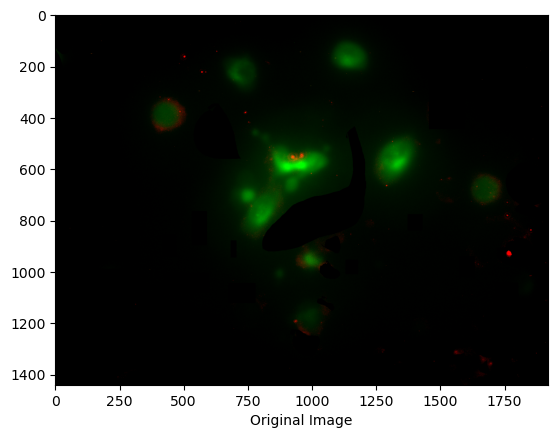

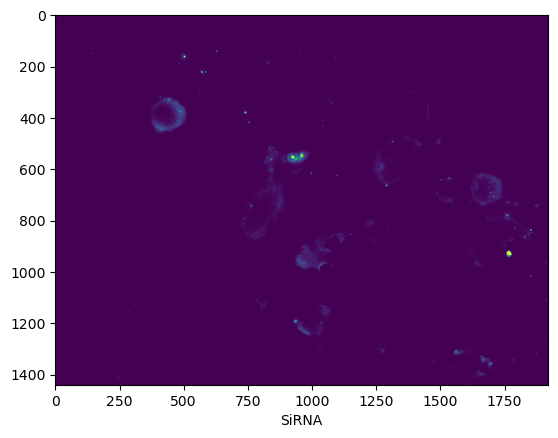

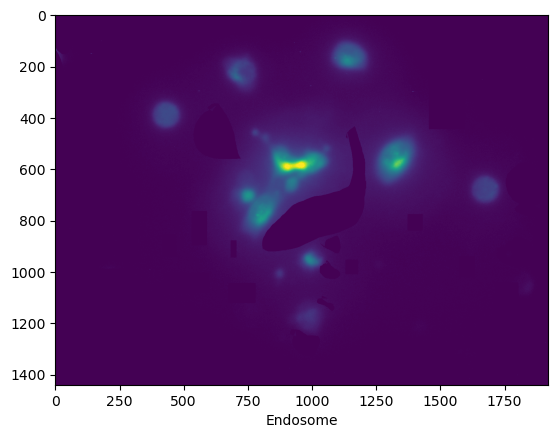

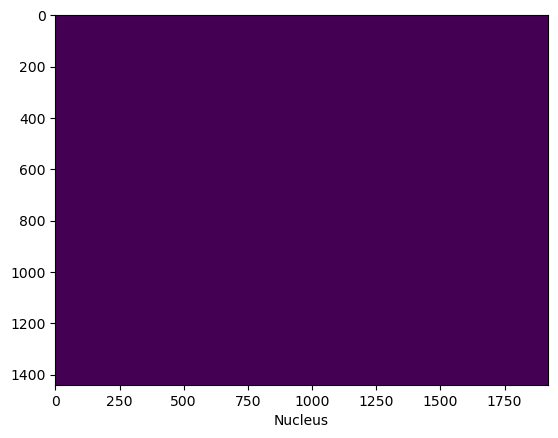

In [6]:
# Display the image
# blue_channel, green_channel, red_channel = cv2.split(image)
import os
import os
import cv2
import numpy as np
import skimage.io
import skimage.color
from skimage.filters import threshold_otsu
import csv

import matplotlib.pyplot as plt
# plt.imshow(red_channel)
# plt.show()
image= skimage.io.imread('C:\\Users\\fnisha\OneDrive - Clemson University\\Desktop\\60\\T0001\\Image_T0001_XY01_Z001_Red and Green Overlay.tif')
# image = skimage.io.imread('C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\data_ovary\\data_ovary1\\copied_60\\T0001\\Image_T0001_XY01_Z001_Red and Green Overlay.tif')
# image = skimage.io.imread('C:\\Users\\fnisha\\OneDrive - Clemson University\\Desktop\\T0040 Overlay All Colors.tif')
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

# Display the original image
plt.imshow(image)
plt.xlabel('Original Image')
plt.show()

# Display the red channel
plt.imshow(red_channel)
plt.xlabel('SiRNA')
plt.show()

# Display the green channel
plt.imshow(green_channel)
plt.xlabel('Endosome')
plt.show()

# # Display the blue channel
plt.imshow(blue_channel)
plt.xlabel('Nucleus')
plt.show()

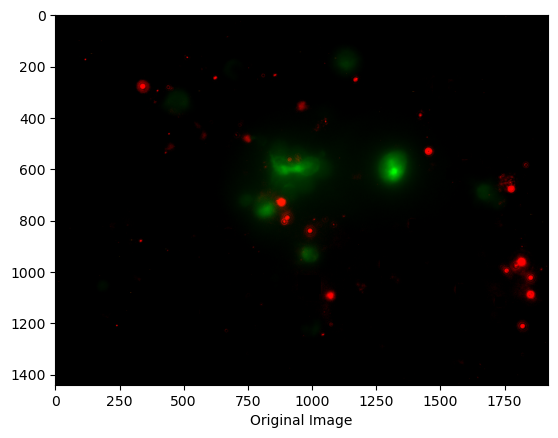

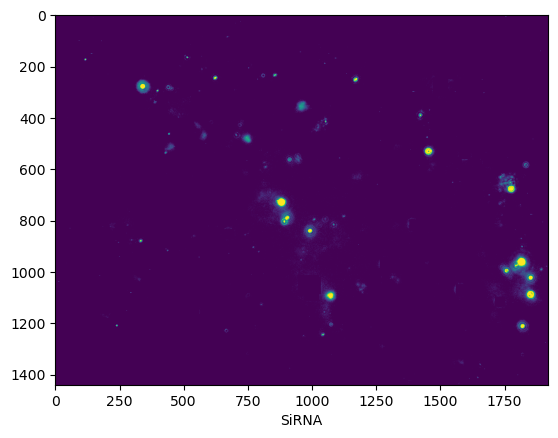

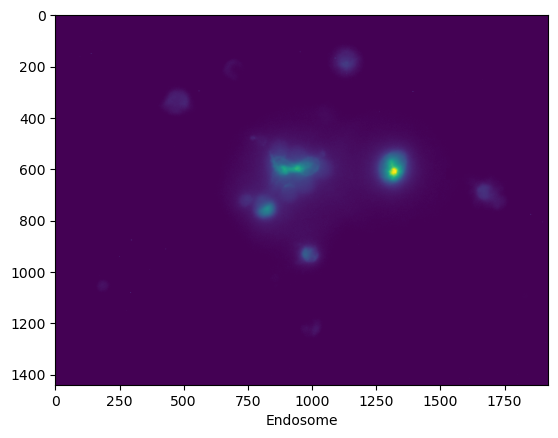

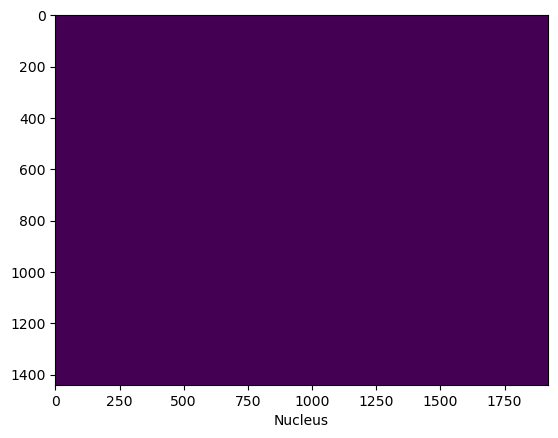

In [7]:

# Display the image
# blue_channel, green_channel, red_channel = cv2.split(image)
import os
import os
import cv2
import numpy as np
import skimage.io
import skimage.color
from skimage.filters import threshold_otsu
import csv

import matplotlib.pyplot as plt
# plt.imshow(red_channel)
# plt.show()
image= skimage.io.imread('C:\\Users\\fnisha\OneDrive - Clemson University\\Desktop\\60\\T0026\\Image_T0026_XY01_Z001_Red and Green Overlay.tif')
# image = skimage.io.imread('C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\data_ovary\\data_ovary1\\copied_60\\T0001\\Image_T0001_XY01_Z001_Red and Green Overlay.tif')
# image = skimage.io.imread('C:\\Users\\fnisha\\OneDrive - Clemson University\\Desktop\\T0040 Overlay All Colors.tif')
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

# Display the original image
plt.imshow(image)
plt.xlabel('Original Image')
plt.show()

# Display the red channel
plt.imshow(red_channel)
plt.xlabel('SiRNA')
plt.show()

# Display the green channel
plt.imshow(green_channel)
plt.xlabel('Endosome')
plt.show()

# # Display the blue channel
plt.imshow(blue_channel)
plt.xlabel('Nucleus')
plt.show()

# Using Otsu to separate Channels on all of Experimental Data

In [105]:
import os
import cv2
import numpy as np
import skimage.io
from skimage.filters import threshold_otsu
import csv

def count_special_red_pixels(image):
    # Ensure the image was provided
    if image is None:
        raise ValueError("Image not provided")

    # Split the image into its R, G, B channels
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    
    # Segment each channel using Otsu's threshold
    red_threshold = threshold_otsu(red_channel)
    green_threshold = threshold_otsu(green_channel)
    blue_threshold = threshold_otsu(blue_channel)
    
    # Create binary masks for each channel
    red_mask = red_channel > red_threshold
    green_mask_off = green_channel <= green_threshold  # We want green to be "off", so we use <= threshold
    blue_mask_off = blue_channel <= blue_threshold
    red_mask_off = red_channel <= red_threshold
    blue_mask = blue_channel > blue_threshold
    green_mask = green_channel > green_threshold

    # Find the pixels where red is on, blue is on, and green is off
    special_red_blue_pixels_mask = red_mask & blue_mask & green_mask_off
    # Find the pixels where red is on, and green is on and blue is off
    special_red_green_pixels_mask = red_mask & green_mask
    # Find the pixels where red is on, and green is off and blue is off
    special_red_no_green_blue = red_mask & green_mask_off & blue_mask_off
    # Find the pixels where red is on, and green is on and blue is on
    special_red_green_blue_pixels_mask = red_mask & green_mask & blue_mask
    # Find the pixels where red is on, and green is off
    special_red_outside_green_pixels_mask = red_mask & green_mask_off
    # Total red pixels
    special_red = red_mask

    # Count these special pixels
    count_red_outside_green = np.sum(special_red_outside_green_pixels_mask)
    count_red_on_blue = np.sum(special_red_blue_pixels_mask) #only on blue not green
    count_red_on_green = np.sum(special_red_green_pixels_mask) # only on green not blue
    count_red_not_greenblue = np.sum(special_red_no_green_blue) #only red no blue and no green
    count_red_on_blue_and_green = np.sum(special_red_green_blue_pixels_mask)
    count_red = np.sum(special_red)

    return count_red_on_green, count_red_outside_green, count_red

# Converting image data to csv data

In [108]:
import os
import csv
import skimage.io

def read_images_from_folders(root_directory):
    # Fixed the path to point to a file rather than a directory
    # output_csv_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\data_ovary\\endosomal_values.csv'
    # output_csv_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\image_analysis_ovary\\raw_edit_endosomal_values_with_ratio.csv'
    output_csv_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\image_analysis_ovary\\80_raw_edit_endosomal_values_with_ratio.csv'

    
    # Check if the file already exists
    file_exists = os.path.isfile(output_csv_path)
    
    # Open CSV file in append mode
    with open(output_csv_path, 'a', newline='') as csvfile:
        csv_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        
        # Write the header row if the file doesn't exist
        if not file_exists:
            csv_writer.writerow(["Main Folder", "Subfolder", "Image Name", "Red on Green Count", "Red outside Green Count", "Total Red Count"])
        
        # Iterate through all folders and subfolders in the root directory
        for dirpath, dirnames, filenames in os.walk(root_directory):
            # Get the relative path from the root directory
            rel_path = os.path.relpath(dirpath, root_directory)
            # Split the relative path into parts
            path_parts = rel_path.split(os.sep)
            
            # Skip processing if we are in the root directory or if the path doesn't have at least two parts
            if len(path_parts) < 2:
                continue
            
            main_folder = path_parts[0]
            subfolder = path_parts[1]
            
            for filename in filenames:
                # Check for .tif image file extensions
                if filename.endswith('.tif'):
                    file_path = os.path.join(dirpath, filename)
                    img = skimage.io.imread(file_path)
                    count_red_on_green, count_red_outside_green, red_total = count_special_red_pixels(img)
                    
                    # Write individual image data to CSV
                    csv_writer.writerow([main_folder, subfolder, filename, count_red_on_green, count_red_outside_green, red_total])
                    
                    # Printing to console (optional)
                    print(f"Main Folder: {main_folder}")
                    print(f"Subfolder: {subfolder}")
                    print(f"Image Name: {filename}")
                    print(f"Red on Green Count: {count_red_on_green}")
                    print(f"Red outside Green Count: {count_red_outside_green}")
                    print(f"Total Red Count: {red_total}")
                    print("----------")
                 

# Example usage
# root_directory = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\data_ovary\\data_ovary1'
# root_directory = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\image_analysis_ovary\\40'
root_directory = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\image_analysis_ovary\\80'
read_images_from_folders(root_directory)


Main Folder: 80_background_edit
Subfolder: T0001
Image Name: T0001_combined.tif
Red on Green Count: 2969
Red outside Green Count: 6736
Total Red Count: 9705
----------
Main Folder: 80_background_edit
Subfolder: T0002
Image Name: T0002_combined.tif
Red on Green Count: 2849
Red outside Green Count: 8205
Total Red Count: 11054
----------
Main Folder: 80_background_edit
Subfolder: T0003
Image Name: T0003_combined.tif
Red on Green Count: 1388
Red outside Green Count: 5828
Total Red Count: 7216
----------
Main Folder: 80_background_edit
Subfolder: T0004
Image Name: T0004_combined.tif
Red on Green Count: 2857
Red outside Green Count: 8059
Total Red Count: 10916
----------
Main Folder: 80_background_edit
Subfolder: T0005
Image Name: T0005_combined.tif
Red on Green Count: 2894
Red outside Green Count: 10815
Total Red Count: 13709
----------
Main Folder: 80_background_edit
Subfolder: T0006
Image Name: T0006_combined.tif
Red on Green Count: 3384
Red outside Green Count: 12069
Total Red Count: 154

In [109]:
import pandas as pd

# Load the CSV file with raw strings
df = pd.read_csv(r'C:\Users\fnisha\Box\AB-Cook-Nisha Research\image_analysis_ovary\80_raw_edit_endosomal_values_with_ratio.csv')

# Extract the peptide ratio from the "Main Folder" column
# Here, you can modify the logic if needed to parse the "Peptide Ratio"
df['Peptide Ratio'] = df['Main Folder']

# Reordering columns to place 'Peptide Ratio' next to 'Main Folder'
df = df[['Main Folder', 'Peptide Ratio'] + [col for col in df.columns if col not in ['Main Folder', 'Peptide Ratio']]]

# Save the updated DataFrame to a new CSV file
updated_file_with_ratio_path = r'C:\Users\fnisha\Box\AB-Cook-Nisha Research\image_analysis_ovary\80_raw_edit_endosomal_values_with_ratio.csv'
df.to_csv(updated_file_with_ratio_path, index=False)

# Display the updated file path
print(f"Updated file saved to: {updated_file_with_ratio_path}")


Updated file saved to: C:\Users\fnisha\Box\AB-Cook-Nisha Research\image_analysis_ovary\80_raw_edit_endosomal_values_with_ratio.csv


# Calculating Experimental endosomal escape

In [111]:
import csv
from collections import defaultdict

def calculate_endosomal_escape(csv_file):
    try:
        # Read the CSV file
        with open(csv_file, 'r') as file:
            reader = csv.reader(file)
            rows = list(reader)
        
        # Ensure there are rows in the CSV
        if not rows:
            print("The CSV file is empty.")
            return
        
        # Extract the headers and numeric rows
        headers = rows[0]
        numeric_rows = rows[1:]
        
        # Identify the column indices for peptide ratio, red outside green count, and red count
        try:
            peptide_ratio_idx = headers.index("Peptide Ratio")
            red_outside_green_idx = headers.index("Red outside Green Count")
            red_count_idx = headers.index("Total Red Count")
        except ValueError as e:
            print(f"Error: Required column headers not found. {e}")
            return
        
        # Dictionary to store the maximum red count for each peptide ratio
        max_red_count_by_ratio = defaultdict(int)
        
        # Find the maximum red count for each peptide ratio
        for row in numeric_rows:
            try:
                peptide_ratio = row[peptide_ratio_idx]
                red_count = float(row[red_count_idx]) if row[red_count_idx].strip() else 0.0
                max_red_count_by_ratio[peptide_ratio] = max(max_red_count_by_ratio[peptide_ratio], red_count)
            except (ValueError, IndexError) as e:
                print(f"Skipping invalid row (max red count calculation): {row}. Error: {e}")
                continue
        
        # Calculate endosomal escape and EFP_in for each row
        for row in numeric_rows:
            try:
                peptide_ratio = row[peptide_ratio_idx]
                red_outside_green_count = float(row[red_outside_green_idx]) if row[red_outside_green_idx].strip() else 0.0
                red_count = float(row[red_count_idx]) if row[red_count_idx].strip() else 0.0
                total_red_last_row = max_red_count_by_ratio.get(peptide_ratio, 0)
                EFP_in = (red_count / total_red_last_row) * 100 if total_red_last_row != 0 else 0
                endosomal_escape = (red_outside_green_count / total_red_last_row) * 100 if total_red_last_row != 0 else 0
                row.append(endosomal_escape)
                row.append(EFP_in)
            except (ValueError, IndexError) as e:
                print(f"Skipping invalid row (calculation): {row}. Error: {e}")
                continue
        
        # Insert the headers for the new columns
        headers.append("Endosomal Escape%")
        headers.append("EFP_in%")

        # Write the updated rows with the new columns back to the CSV file
        with open(csv_file, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows([headers] + numeric_rows)

        print("CSV file updated successfully.")

    except FileNotFoundError:
        print(f"Error: The file {csv_file} was not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
csv_file_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\image_analysis_ovary\\80_raw_edit_endosomal_values_with_ratio.csv'
calculate_endosomal_escape(csv_file_path)


CSV file updated successfully.


# Plot Experimental Data

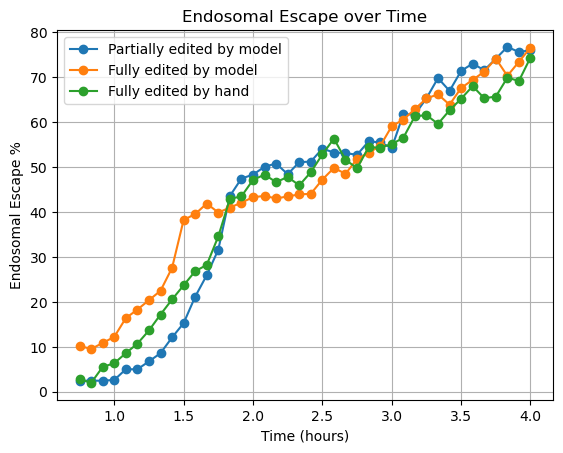

In [1]:
import os
import csv
import matplotlib.pyplot as plt

def plot_endosomal_escape(csv_file):
    # Read the CSV file
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        rows = list(reader)
    
    # Extract the header and numeric rows
    header = rows[0]
    numeric_rows = rows[1:]
    
    # Filter rows based on the main folders being '40.0' and '80.0'
    rows_40 = [row for row in numeric_rows if row[0] == '80_edited_images']
    rows_80 = [row for row in numeric_rows if row[0] == '80_raw_image_output_folder']
    rows_801 = [row for row in numeric_rows if row[0] == '80_background_edit']
    rows_copied_80 = [row for row in numeric_rows if row[0] == 'copied_80']
    rows_interpolate_80 = [row for row in numeric_rows if row[0] == 'interpolate_80']
    # rows_copied_40 = [row for row in numeric_rows if row[0] == 'copied_40']
    # rows_copied_60 = [row for row in numeric_rows if row[0] == 'copied_60']
    # rows_copied_20 = [row for row in numeric_rows if row[0] == 'copied_20']
    
    # Extract endosomal escape values from the filtered rows
    endosomal_escape_40 = [float(row[-2]) for row in rows_40]
    endosomal_escape_80 = [float(row[-2]) for row in rows_80]
    endosomal_escape_801 = [float(row[-2]) for row in rows_801]
    endosomal_escape_802 = [float(row[-2]) for row in rows_interpolate_80]
    # endosomal_escape_copied_20 = [float(row[-2]) for row in rows_copied_20]
    # endosomal_escape_copied_40 = [float(row[-2]) for row in rows_copied_40]
    # endosomal_escape_copied_60 = [float(row[-2]) for row in rows_copied_60]
    endosomal_escape_copied_80 = [float(row[-2]) for row in rows_copied_80]
    
    # Define time points for plotting
    start_time_40 =45  # Start time in minutes for 40.0 ratio
    time_interval_40 = 5  # Time interval in minutes for 40.0 ratio
    time_points_40 = [(start_time_40 + i * time_interval_40)/60 for i in range(len(endosomal_escape_40))]
    
    start_time_80 = 45  # Start time in minutes for 80.0 ratio
    time_interval_80 = 5  # Time interval in minutes for 80.0 ratio
    time_points_80 = [(start_time_80 + i * time_interval_80)/60 for i in range(len(endosomal_escape_80))]
    
    start_time_801 = 45  # Start time in minutes for 80.0 ratio
    time_interval_801 = 5  # Time interval in minutes for 80.0 ratio
    time_points_801 = [(start_time_801 + i * time_interval_801)/60 for i in range(len(endosomal_escape_801))]
    
    start_time_802 = 45  # Start time in minutes for 80.0 ratio
    time_interval_802 = 5  # Time interval in minutes for 80.0 ratio
    time_points_802 = [(start_time_802 + i * time_interval_802)/60 for i in range(len(endosomal_escape_802))]
    # start_time_copied_20 = 60  # Start time in minutes for 40.0 ratio
    # time_interval_copied_20 = 15  # Time interval in minutes for 40.0 ratio
    # time_points_copied_20 = [(start_time_copied_20 + i * time_interval_copied_20)/60 for i in range(len(endosomal_escape_copied_20))]
    
    # start_time_copied_40 = 90  # Start time in minutes for 40.0 ratio
    # time_interval_copied_40 = 7  # Time interval in minutes for 40.0 ratio
    # time_points_copied_40 = [(start_time_copied_40 + i * time_interval_copied_40)/60 for i in range(len(endosomal_escape_copied_40))]
    
    # start_time_copied_60 = 60  # Start time in minutes for 40.0 ratio
    # time_interval_copied_60 = 15  # Time interval in minutes for 40.0 ratio
    # time_points_copied_60 = [(start_time_copied_60 + i * time_interval_copied_60)/60 for i in range(len(endosomal_escape_copied_60))]
    
    start_time_copied_80 = 45  # Start time in minutes for 80.0 ratio
    time_interval_copied_80 = 5  # Time interval in minutes for 80.0 ratio
    time_points_copied_80 = [(start_time_copied_80 + i * time_interval_copied_80)/60 for i in range(len(endosomal_escape_copied_80))]
    
    # Plot endosomal escape versus time for both main folders
    plt.plot(time_points_40, endosomal_escape_40, marker='o', linestyle='-', label='Partially edited by model')
    # plt.plot(time_points_40, endosomal_escape_40, marker='o', linestyle='-', label='40_raw.0')
    # plt.plot(time_points_80, endosomal_escape_80, marker='o', linestyle='-', label='80_mask_raw')
    # plt.plot(time_points_801, endosomal_escape_801, marker='o', linestyle='-', label='80_background_edit_mask')
    plt.plot(time_points_802, endosomal_escape_802, marker='o', linestyle='-', label='Fully edited by model')
    # plt.plot(time_points_copied_20, endosomal_escape_copied_20, marker='o', linestyle='-', label='20:1')
    # plt.plot(time_points_copied_40, endosomal_escape_copied_40, marker='o', linestyle='-', label='40:1')
    # plt.plot(time_points_copied_60, endosomal_escape_copied_60, marker='o', linestyle='-', label='60:1')
    plt.plot(time_points_copied_80, endosomal_escape_copied_80, marker='o', linestyle='-', label='Fully edited by hand')
    
    plt.xlabel('Time (hours)')
    plt.ylabel('Endosomal Escape %')
    # plt.title('Endosomal Escape versus Time for 20:1, 40:1,60:1, 80:1 peptide ratio')
    plt.title('Endosomal Escape over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
# csv_file_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\data_ovary\\endosomal_values.csv'
# csv_file_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\data_ovary\\data_ovary1\\copied_80_endosomal_values.csv'
# csv_file_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\data_ovary\\data_ovary1\\updated_endosomal_values_with_ratio.csv'
# csv_file_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\image_analysis_ovary\\80_raw_edit_endosomal_values_with_ratio.csv'
csv_file_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\image_analysis_ovary\\80_dataset_with_fixed_cycles.csv'
# csv_file_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\data_ovary\\data_ovary1\\All_RATIO_endosomal_values.csv'
plot_endosomal_escape(csv_file_path)





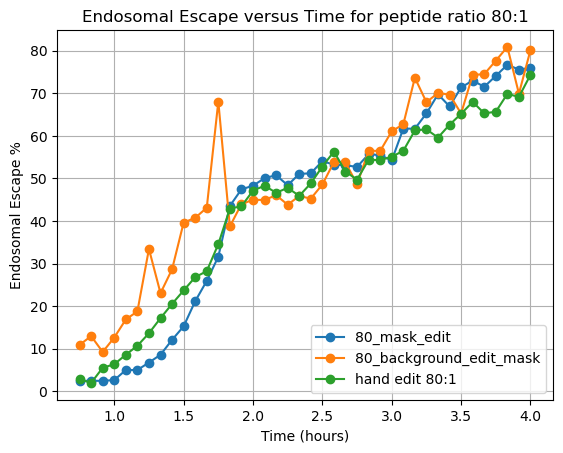

In [57]:
import os
import csv
import matplotlib.pyplot as plt

def plot_endosomal_escape(csv_file):
    # Read the CSV file
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        rows = list(reader)
    
    # Extract the header and numeric rows
    header = rows[0]
    numeric_rows = rows[1:]
    
    # Filter rows based on the main folders being '40.0' and '80.0'
    rows_40 = [row for row in numeric_rows if row[0] == '80_edited_images']
    rows_80 = [row for row in numeric_rows if row[0] == '80_raw_image_output_folder']
    rows_801 = [row for row in numeric_rows if row[0] == '80_background_edit']
    rows_copied_80 = [row for row in numeric_rows if row[0] == 'copied_80']
   
    # rows_copied_40 = [row for row in numeric_rows if row[0] == 'copied_40']
    # rows_copied_60 = [row for row in numeric_rows if row[0] == 'copied_60']
    # rows_copied_20 = [row for row in numeric_rows if row[0] == 'copied_20']
    
    # Extract endosomal escape values from the filtered rows
    endosomal_escape_40 = [float(row[-2]) for row in rows_40]
    endosomal_escape_80 = [float(row[-2]) for row in rows_80]
    endosomal_escape_801 = [float(row[-2]) for row in rows_801]
    # endosomal_escape_copied_20 = [float(row[-2]) for row in rows_copied_20]
    # endosomal_escape_copied_40 = [float(row[-2]) for row in rows_copied_40]
    # endosomal_escape_copied_60 = [float(row[-2]) for row in rows_copied_60]
    endosomal_escape_copied_80 = [float(row[-2]) for row in rows_copied_80]
    
    # Define time points for plotting
    start_time_40 =45  # Start time in minutes for 40.0 ratio
    time_interval_40 = 5  # Time interval in minutes for 40.0 ratio
    time_points_40 = [(start_time_40 + i * time_interval_40)/60 for i in range(len(endosomal_escape_40))]
    
    start_time_80 = 45  # Start time in minutes for 80.0 ratio
    time_interval_80 = 5  # Time interval in minutes for 80.0 ratio
    time_points_80 = [(start_time_80 + i * time_interval_80)/60 for i in range(len(endosomal_escape_80))]
    
    start_time_801 = 45  # Start time in minutes for 80.0 ratio
    time_interval_801 = 5  # Time interval in minutes for 80.0 ratio
    time_points_801 = [(start_time_801 + i * time_interval_801)/60 for i in range(len(endosomal_escape_801))]
    # start_time_copied_20 = 60  # Start time in minutes for 40.0 ratio
    # time_interval_copied_20 = 15  # Time interval in minutes for 40.0 ratio
    # time_points_copied_20 = [(start_time_copied_20 + i * time_interval_copied_20)/60 for i in range(len(endosomal_escape_copied_20))]
    
    # start_time_copied_40 = 90  # Start time in minutes for 40.0 ratio
    # time_interval_copied_40 = 7  # Time interval in minutes for 40.0 ratio
    # time_points_copied_40 = [(start_time_copied_40 + i * time_interval_copied_40)/60 for i in range(len(endosomal_escape_copied_40))]
    
    # start_time_copied_60 = 60  # Start time in minutes for 40.0 ratio
    # time_interval_copied_60 = 15  # Time interval in minutes for 40.0 ratio
    # time_points_copied_60 = [(start_time_copied_60 + i * time_interval_copied_60)/60 for i in range(len(endosomal_escape_copied_60))]
    
    start_time_copied_80 = 45  # Start time in minutes for 80.0 ratio
    time_interval_copied_80 = 5  # Time interval in minutes for 80.0 ratio
    time_points_copied_80 = [(start_time_copied_80 + i * time_interval_copied_80)/60 for i in range(len(endosomal_escape_copied_80))]
    
    # Plot endosomal escape versus time for both main folders
    plt.plot(time_points_40, endosomal_escape_40, marker='o', linestyle='-', label='80_mask_edit')
    # plt.plot(time_points_40, endosomal_escape_40, marker='o', linestyle='-', label='40_raw.0')
    # plt.plot(time_points_80, endosomal_escape_80, marker='o', linestyle='-', label='80_mask_raw')
    plt.plot(time_points_801, endosomal_escape_801, marker='o', linestyle='-', label='80_background_edit_mask')
    # plt.plot(time_points_copied_20, endosomal_escape_copied_20, marker='o', linestyle='-', label='20:1')
    # plt.plot(time_points_copied_40, endosomal_escape_copied_40, marker='o', linestyle='-', label='40:1')
    # plt.plot(time_points_copied_60, endosomal_escape_copied_60, marker='o', linestyle='-', label='60:1')
    plt.plot(time_points_copied_80, endosomal_escape_copied_80, marker='o', linestyle='-', label='hand edit 80:1')
    
    plt.xlabel('Time (hours)')
    plt.ylabel('Endosomal Escape %')
    # plt.title('Endosomal Escape versus Time for 20:1, 40:1,60:1, 80:1 peptide ratio')
    plt.title('Endosomal Escape versus Time for peptide ratio 80:1')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
# csv_file_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\data_ovary\\endosomal_values.csv'
# csv_file_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\data_ovary\\data_ovary1\\copied_80_endosomal_values.csv'
# csv_file_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\data_ovary\\data_ovary1\\updated_endosomal_values_with_ratio.csv'
csv_file_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\image_analysis_ovary\\80_raw_edit_endosomal_values_with_ratio.csv'
# csv_file_path = 'C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\data_ovary\\data_ovary1\\All_RATIO_endosomal_values.csv'
plot_endosomal_escape(csv_file_path)





In [ ]:
#interpolate time series data point only for outliers